In [1]:
from skmultiflow.data import MIXEDGenerator
from study.reoccuring_drift_stream import ReoccuringDriftStream
from rrslvq import ReactiveRobustSoftLearningVectorQuantization
from skmultiflow.meta import OzaBaggingADWINClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.evaluation import EvaluatePrequential
import warnings

warnings.filterwarnings('ignore')

In [2]:
s1 = MIXEDGenerator(classification_function = 1, random_state= 112, balance_classes = False)
s2 = MIXEDGenerator(classification_function = 0, random_state= 112, balance_classes = False)


stream = ReoccuringDriftStream(stream=s1, drift_stream=s2,random_state=None,alpha=90.0, position=2000,width=1)


rrslvq = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=4,sigma=12)
oza = OzaBaggingADWINClassifier(base_estimator=KNNClassifier(), n_estimators=2)



evaluator = EvaluatePrequential(show_plot=True,max_samples=10000,
restart_stream=True,batch_size=10,metrics=[ 'accuracy', 'kappa', 'kappa_m'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


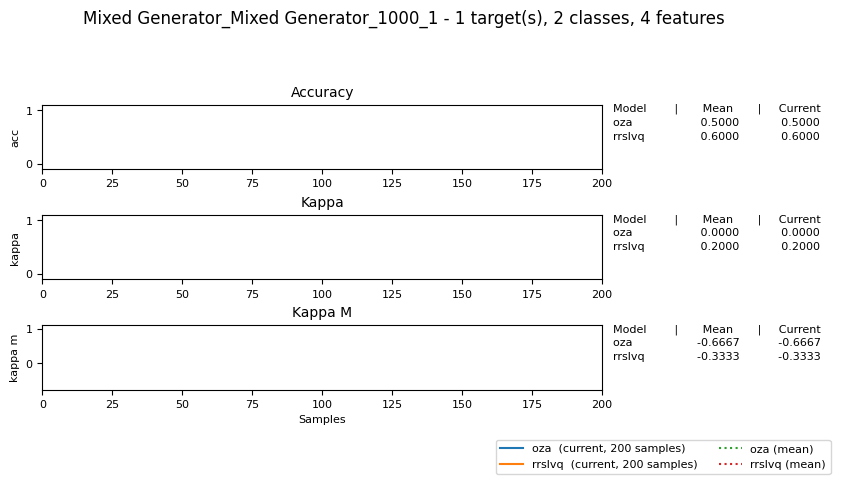

 #------------------- [5%] [0.83s]

<Figure size 640x480 with 0 Axes>

 ###----------------- [15%] [2.09s]

<Figure size 640x480 with 0 Axes>

 ####---------------- [20%] [2.76s]

<Figure size 640x480 with 0 Axes>

 ######-------------- [30%] [4.12s]

<Figure size 640x480 with 0 Axes>

 #######------------- [35%] [4.81s]

<Figure size 640x480 with 0 Axes>

 #########----------- [45%] [6.13s]

<Figure size 640x480 with 0 Axes>

 ###########--------- [55%] [7.50s]

<Figure size 640x480 with 0 Axes>

 ############-------- [60%] [8.20s]

<Figure size 640x480 with 0 Axes>

 ##############------ [70%] [9.55s]

<Figure size 640x480 with 0 Axes>

 ###############----- [75%] [10.22s]

<Figure size 640x480 with 0 Axes>

 #################--- [85%] [11.49s]

<Figure size 640x480 with 0 Axes>

 ###################- [95%] [12.81s]

<Figure size 640x480 with 0 Axes>

 #################### [100%] [13.46s]
Processed samples: 10000
Mean performance:
oza - Accuracy     : 0.7088
oza - Kappa        : 0.4179
oza - Kappa M      : 0.4115
rrslvq - Accuracy     : 0.7721
rrslvq - Kappa        : 0.5442
rrslvq - Kappa M      : 0.5396


AttributeError: 'ReactiveRobustSoftLearningVectorQuantization' object has no attribute 'gamma'

In [3]:
evaluator.evaluate(stream=stream, model=[oza, rrslvq],model_names=["oza","rrslvq"])